# 🏥 Insurance Cost Prediction

This project uses regression models to predict medical insurance charges based on features like age, BMI, and smoking status.  
We’ll compare Linear Regression with a Random Forest Regressor and evaluate both using RMSE and R² score.

## 1. Data Exploration

First, we’ll explore the structure of the dataset and check for null values, data types, and basic statistics.  
This helps us understand what features are available and what needs preprocessing.

## 2. Data Preprocessing

We’ll convert categorical variables (like `'smoker'`) into numeric format using mapping or encoding.  
We’ll also select only relevant numeric features: `age`, `bmi`, and `smoker`, as these show a strong correlation with charges.

## 3. Model Training

We’ll train two models:
- Linear Regression (basic baseline)
- Random Forest Regressor (captures nonlinear patterns)

Both models are trained on 75% of the data and tested on 25%.

## 4. Model Evaluation

We evaluate the models using:
- **RMSE (Root Mean Squared Error):** Lower is better
- **R² Score:** Closer to 1 means better fit

We also visualize predicted vs. actual charges for both models.

## 📌 Conclusion

- **Linear Regression** achieved RMSE ≈ 5875 and R² ≈ 0.77
- **Random Forest** performed better with RMSE ≈ 5066 and R² ≈ 0.83
- The feature `'smoker'` had the strongest impact on predicted costs
- The model successfully predicts insurance charges using minimal features with high accuracy

This project demonstrates a full ML workflow from data exploration to model comparison.

## 💡 Next Steps

- Try hyperparameter tuning for Random Forest  
- Explore additional features like `'children'` or one-hot encoding `'region'`  
- Try other regressors like GradientBoosting or XGBoost

In [1]:
#Importing necessary libraries for EDA and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#In this project we are using a Insurance dataset
#Our goal is to predict/calculate the Insurance charges based on various factors such as age, bmi and smoking habits
df =  pd.read_csv('insurance.csv') #using pandas library to read the csv
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [165]:
# to get info about the data set like number of rows and columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [166]:
#to check null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


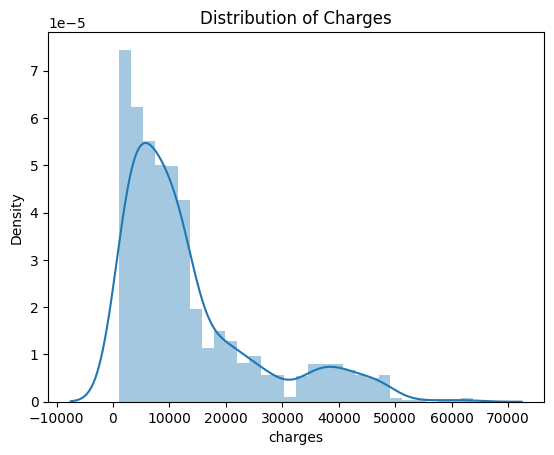

In [167]:
#to check the most common number of charge
sns.distplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

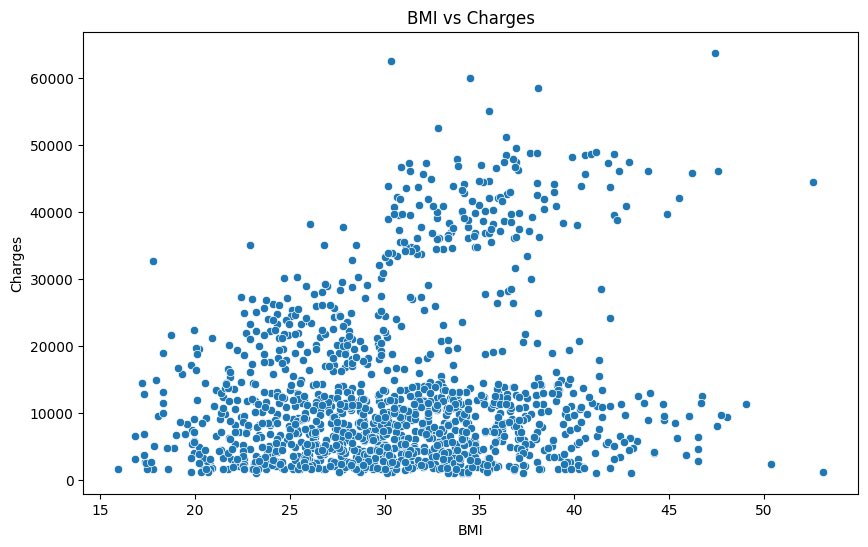

In [168]:
#Visualization to check how bmi can affect the charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

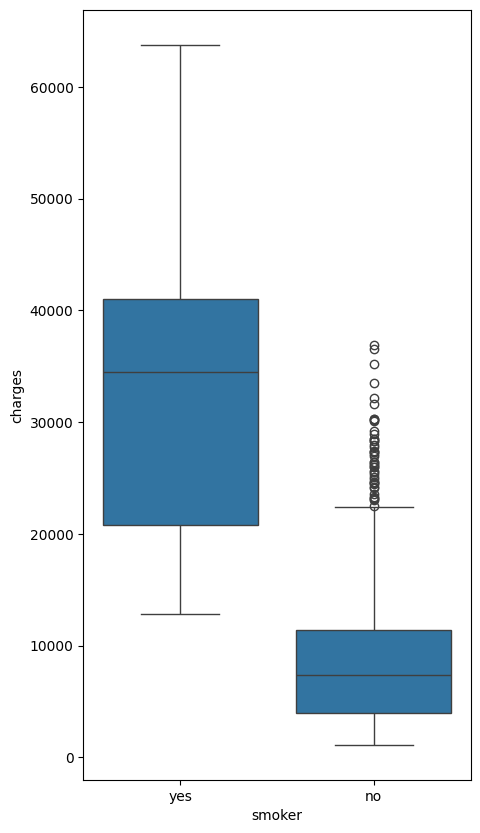

In [169]:
#Visualization to check how smoking habit can affect charges
plt.figure(figsize=(5,10))
sns.boxplot(data=df, x='smoker', y='charges')

In [170]:
#'smoker' is very important column in the dataset affecting charges dramatically
# Since 'smoker' is in string format we need to change its datatype into int64
# using .map funcion we can change 'yes' and 'no' into boolean inputs
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [199]:
#datatype of 'smoker' has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [171]:
# splitting data for training and testing

x = df[['age', 'bmi', 'smoker']]
y = df['charges']

In [172]:
#Checking dimension
x.ndim

2

In [173]:
x


,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [174]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [175]:
#Importing train_test_split to train our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [176]:
#Importing our regressor model (Linear Regression in this case)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Fitting the model with training data so it can calculate the parameters
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [177]:
y_pred = model.predict(x_test)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [178]:
#Checking RMSE
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 5874.763304187489


In [179]:
#Checking r2 score for accuracy
r2_score(y_test, y_pred)


0.7776932310583374

In [180]:
#Here we are using a different model (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Fitting the model with training data so it can calculate the parameters
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [185]:
y_predr = model.predict(x_test)
y_pred

array([ 9140.3489329 ,  5357.3381385 , 28278.7189985 ,  9852.5630472 ,
       34985.6366533 ,  6678.1913971 ,  1739.656281  , 14781.4557341 ,
        5400.8953408 ,  9239.7943309 , 19541.1196214 ,  7096.431287  ,
       10544.5160988 , 46245.5698459 , 48704.6057295 , 45590.6900856 ,
        9841.067089  , 43156.9943125 ,  9309.2600253 , 25085.4454371 ,
        3703.1555504 ,  8379.6940416 ,  4001.57285805,  2240.5057195 ,
       12180.0235206 , 10893.33194223, 15562.9044276 ,  4530.3507561 ,
        9062.7354652 , 11165.84989858,  6373.4164195 , 13227.25669908,
        3924.4173116 ,  4506.0619205 ,  5812.6517447 ,  9172.722027  ,
        2124.504116  , 10327.1033077 , 24409.5114375 , 38723.91184   ,
        1725.80372189,  2636.0773593 , 12116.261972  , 13582.5688807 ,
        5468.558218  , 12739.0350315 ,  9211.8608009 ,  8704.6992585 ,
       41804.6907906 ,  7674.7891294 , 14510.2641667 ,  4155.57319402,
        6330.079023  ,  2045.3724805 , 12269.87642   ,  9255.2439235 ,
      

In [186]:
#cheking r2score for accuracy
r2_score(y_test, y_predr)

0.8346644445453022

In [184]:
#Checking RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 5066.372988127661


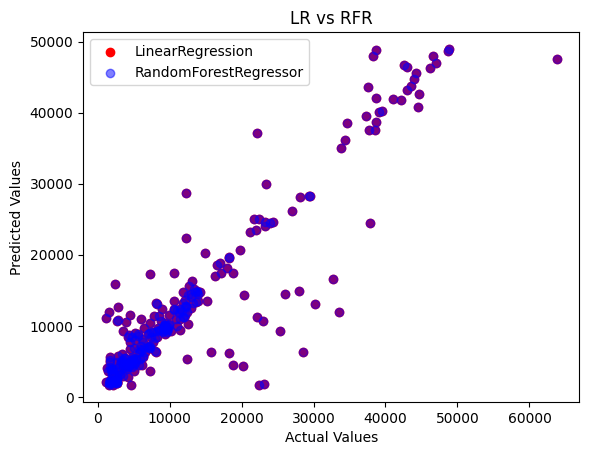

In [197]:
#Visualization to see how both the models compare
plt.scatter(y_test, y_pred, c = 'r', label = 'LinearRegression')
plt.scatter(y_test, y_predr, c = 'b', label = 'RandomForestRegressor', alpha = 0.5)
plt.title('LR vs RFR')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()